Report Mohamed Benyahia

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Loading data

data_matrix_train, COP_train, data_matrix_test, COP_test, names = np.load('data_center_data_matrix.npy', allow_pickle=True)

# Constructing matrices for min_w ||A w - b||_2**2

matrix_mean = np.mean(data_matrix_train, axis=0)
M = data_matrix_train - matrix_mean
matrix_std = np.std(M, axis=0)
M = M / matrix_std

A = np.hstack([M, np.ones((M.shape[0],1)), -(M.T * COP_train[:,3]).T])
b = COP_train[:,3]

# Constructing matrices for the test set

M_test = (data_matrix_test - matrix_mean) / matrix_std
A_test = np.hstack([M_test, np.ones((M_test.shape[0],1)), -(M_test.T * COP_test[:,3]).T])
b_test = COP_test[:,3]


# Loading raw data
import pandas as pd
data = pd.read_csv('Raw_Dataset_May.csv')

def name_to_subcategory_and_details(col_name):
    if np.isreal(col_name):
        col_name = names[col_name]
    indices = np.nonzero((data['NAME'] == col_name).values)[0]
    if len(indices) > 0:
        subcategory = data['SUBCATEGORY'].iloc[[indices[0]]].values[0]
        details = data['DETAILS'].iloc[[indices[0]]].values[0]
        return subcategory, details
    else:
        print('unknown name')

Question 3.1:


$ Aw=b => (Aw)_t = b_t= y(t)   \forall t $ => $ \tilde{x}(t)^Tw_1 + w_0 -y(t)\tilde{x}(t)^Tw_2=y(t) \forall t  $   
=> $y(t) . (1+\tilde{x}(t)^Tw_2)= \tilde{x}(t)^Tw_1 + w_0 \forall t $  
=> $y(t)= \frac{\tilde{x}(t)^Tw_1 + w_0}{1+\tilde{x}(t)^Tw_2} \forall t $   
=> $y(t)= \frac{w_1^T\tilde{x}(t) + w_0}{1+w_2^T\tilde{x}(t)} \forall t $


Question 3.2:

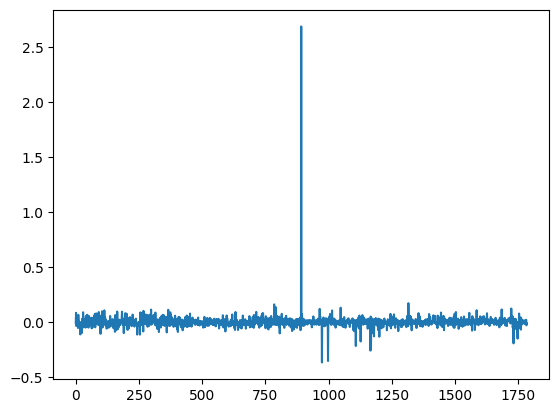

In [2]:
w = np.linalg.lstsq(A,b,rcond=None)[0]
plt.plot(w)

Question 3.3:

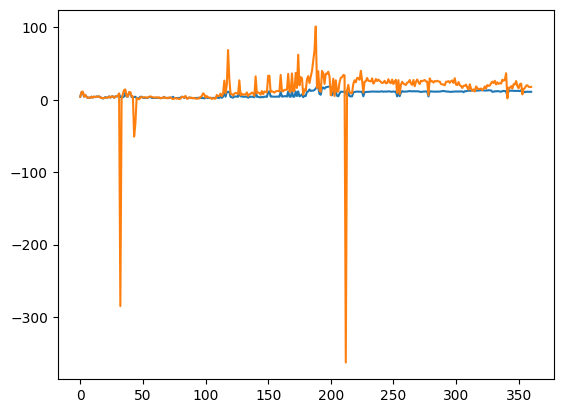

In [3]:
btest_predicted= A_test@w
plt.plot(b_test)
plt.plot(btest_predicted)


Question 3.4:

let $f(w) = \frac{1}{2} ||Aw-b||^2 + \frac{\lambda}{2} ||w||^2 $
then for $\nabla f(w) = A^T(Aw-b)+\lambda w = 0 $ we have $(A^TA+\lambda I)w=A^Tb$.

780.8984793523537
301.0548280941217


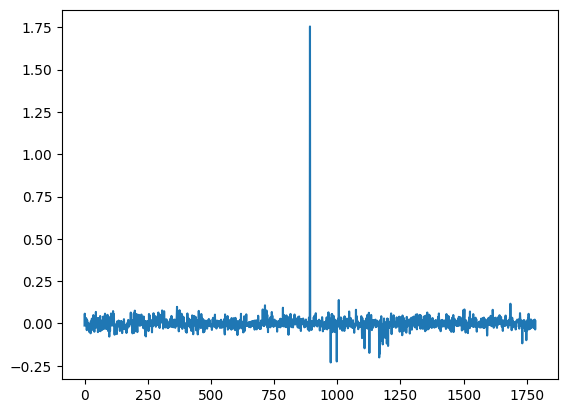

In [4]:
lambda_val=100
AtA= np.matmul(np.transpose(A),A)
I = np.eye(AtA.shape[0])
w_reg= np.linalg.solve(AtA+lambda_val*I,np.transpose(A)@b)
plt.plot(w_reg)
MSE = np.dot(A_test@w-b_test,A_test@w-b_test)/len(b_test)
MSE_reg = np.dot(A_test@w_reg-b_test,A_test@w_reg-b_test)/len(b_test)
print(MSE)
print(MSE_reg)

The MSE for the regularized model is less than the MSE for the unregularized model.

Question 3.5:

$\nabla f(w) = A^T(Aw-b)+\lambda w $  then  
$\nabla ^2 f(w)= A^TA +\lambda I $  
for x  we have $ x^T(A^TA +\lambda I)x= ||Ax||^2 +\lambda ||x||^2>=0$ with $\lambda>=0$  
then $\nabla ^2 f(w)>=0$ then f is convex.


Question 3.6:

 If we have $\nabla ^2 f(w) <L I $ then we can choose as a step size $\gamma= 1/L $

In [5]:
def grad_f(w_desc):
    return AtA@w_desc-np.transpose(A)@b+lambda_val*w_desc

number of iterations 118766


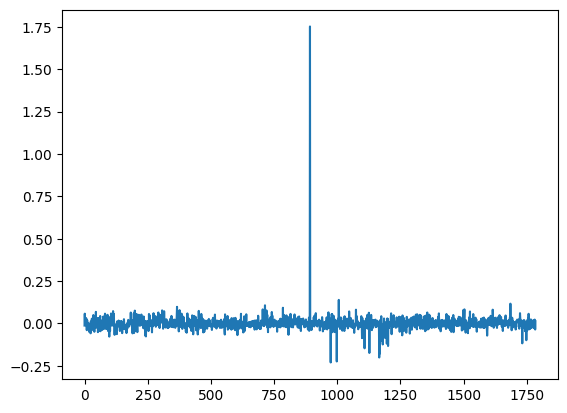

In [6]:
w_desc= np.zeros(w.shape)
i=0


grad_f_norm= np.linalg.norm(grad_f(w_desc))
hessian_f= AtA+lambda_val*I
eigmax= np.linalg.norm(hessian_f)
stepsize= 1/eigmax

while grad_f_norm>1 and grad_f_norm!=0:

    w_desc=w_desc-stepsize*(grad_f(w_desc))
    grad_f_norm=np.linalg.norm(grad_f(w_desc))
    i=i+1
    

print("number of iterations",i)
plt.plot(w_desc)



Question 3.7 :

number of iterations 51167


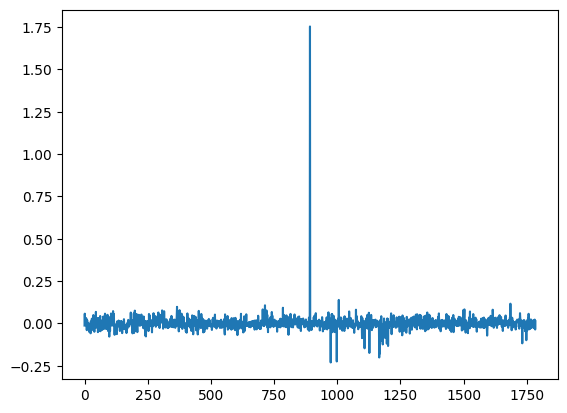

In [7]:
w_conjGrad= np.zeros(w.shape)

hessian_f= AtA+lambda_val*I
r=np.transpose(A)@b-hessian_f@w_conjGrad
epsilon=1
i=0
while np.linalg.norm(grad_f(w_conjGrad))>1:
    p=r
    conjStepSize=np.dot(r,r)/np.dot(p,hessian_f@p)
    w_conjGrad=w_conjGrad+conjStepSize*p
    
    beta=np.linalg.norm(r-conjStepSize*(hessian_f@p))**2/np.linalg.norm(r)**2
    r=r-conjStepSize*(hessian_f@p)
    p=-r+beta*p
    
    i=i+1
print("number of iterations",i)
plt.plot(w_conjGrad)


The classic gradient method took 118766 iterations while the conjugate gradient method took 51167 iterations, it is two times faster.

Question 4.1 :

$\nabla f_2 = A^T(Aw-b) $   
$g_2(x)= \sum_{i=1}^{n} g_i(x_i)$  

$prox_{g2} = (prox_{g_i}(x_i))$  
where $prox_{ g_i}(x_i) = x_i +\lambda $ if $x_i<-\lambda$  

$prox_{g_i}(x_i) = 0 $ if $-\lambda<=x_i<=\lambda$  

$prox_{g_i}(x_i) = x_i -\lambda $ if $x_i>\lambda$


Question 4.2 :

In [8]:
def f2(w):
    return np.linalg.norm(A@w-b)**2/2
def grad_f_2(w_prox):
    return np.transpose(A)@(A@w_prox-b)
def prox_gamma_g2i(gamma,x,lambda_val=lambda_val):
    res=np.zeros(w.shape)
    for i in range(len(res)):
        if  x[i]<-gamma*lambda_val:
            res[i]= x[i]+gamma*lambda_val
        elif x[i]<gamma*lambda_val and x[i]>=-gamma*lambda_val:
            res[i]= 0
        else:
            res[i]=x[i]-gamma*lambda_val
    return res


number of iterations 47086


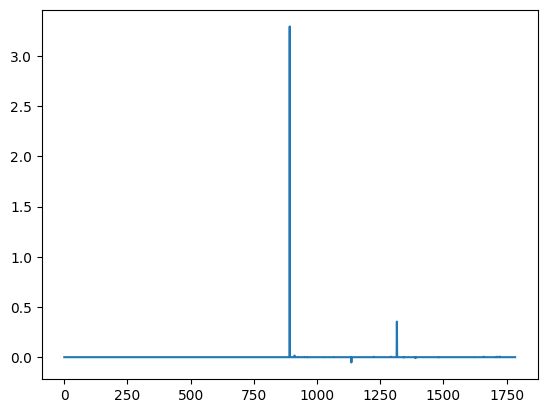

In [14]:
lambda_val=200

w_prox= np.zeros(w.shape)

hessian_f_2= AtA
eigmax_2= np.linalg.norm(hessian_f_2)
stepsize_2= 1/eigmax_2

epsilon=10**(-6)
diff=1
i=0
while diff>epsilon:

    
    diff=np.linalg.norm(w_prox-prox_gamma_g2i(stepsize_2,w_prox-stepsize_2*grad_f_2(w_prox)))
    w_prox=prox_gamma_g2i(stepsize_2,w_prox-stepsize_2*grad_f_2(w_prox))
    
    
    i=i+1
    
print("number of iterations",i)  
plt.plot(w_prox)



Question 4.3 :  
Taylor based line search

882


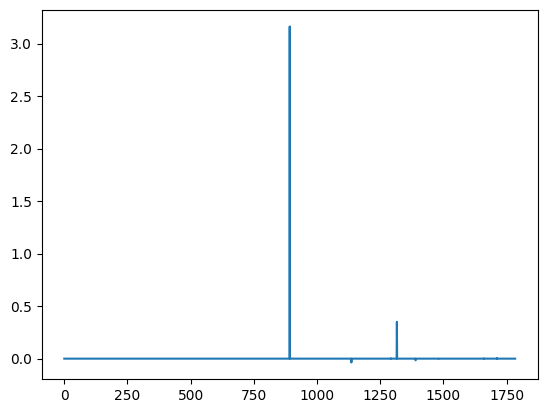

In [16]:

def w_plus(gamma,w_lineSearch,lambda_val):
    return prox_gamma_g2i(gamma,w_lineSearch-gamma*grad_f_2(w_lineSearch),lambda_val)
l=0
def taylorConditionIsTrue(c,d,l,w_lineSearch,lambda_val):
    gamma=d*(c**l)
    return f2(w_plus(gamma,w_lineSearch,lambda_val))<=f2(w_lineSearch)+np.dot(grad_f_2(w_lineSearch),w_plus(gamma,w_lineSearch,lambda_val)-w_lineSearch)+np.linalg.norm(w_lineSearch-w_plus(gamma,w_lineSearch,lambda_val))**2/(2*gamma)

def LineSearch(lambda_val=200,epsilon=10**(-6)):
    c=0.5
    d=0.5
    w_lineSearch=np.zeros(w.shape)
    i=0
    
    
    diff=1
    while diff>epsilon:
        l=0
        while not taylorConditionIsTrue(c,d,l,w_lineSearch,lambda_val):
            l=l+1
            
        gamma=d*(c**l)
        d=2*gamma
        
        
        diff=np.linalg.norm(w_lineSearch-w_plus(gamma,w_lineSearch,lambda_val))
        w_lineSearch=w_plus(gamma,w_lineSearch,lambda_val)
        i=i+1
    
    return w_lineSearch,i
w_lineSearch, nb= LineSearch()
print(nb)
plt.plot(w_lineSearch)

    
    


For the same $\epsilon=10^{-6}$ The proximal gradient method took 47086 iterations while taylor based line search method took only 882 iterations.  Taylor based line search method is 53 times faster. 

5. Choice of the regularization parameter :

In [19]:
ro_0=200
a=0.1
K=5
def f2_test(w):
    return np.linalg.norm(A_test@w-b_test)**2/2
def ro(s):
    return ro_0*(a**s)

maximum= 0
ro_best=0
for k in range(K):
    lambda_val=ro(k)
    result,nb= LineSearch(lambda_val,10**(-4))
    if maximum<f2_test(result):
        maximum=f2_test(result)
        ro_best=lambda_val
    print("k=",k)

print("The best value for ro",ro_best)

    

k= 0
k= 1
k= 2
k= 3
k= 4
The best value for ro 0.020000000000000004


6. Comparison

Question 6.1 :

The Lasso regularization is better than the ridge regularization for our data because it forced the small but nonzero values to zeros so we obtain a more generalized solution. 